In [1]:
import numpy as np
import pandas as pd
import snsims
print(snsims.__version__)

ModuleNotFoundError: No module named 'healpy'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import FlatLambdaCDM

In [4]:
import sncosmo

In [5]:
DC2 = FlatLambdaCDM(H0=71, Om0=0.265, Ob0=0.0448)

## SN hosted in the galaxies

In [2]:
#galaxy file name (contains galaxies with data from the rotated reference catalog and the gcr)
galfilename = '/Users/rbiswas/data/LSST/DC2/protoDC2_rotated_combined.hdf'

In [3]:
gals = pd.read_hdf(galfilename)

In [4]:
gals.head()

,diskMassStellar,galaxy_id,morphology/diskHalfLightRadiusArcsec,morphology/diskMinorAxisArcsec,morphology/positionAngle,morphology/spheroidHalfLightRadiusArcsec,morphology/spheroidMinorAxisArcsec,size_bulge_true,size_disk_true,totalMassStellar,uniqueId,raJ2000,decJ2000,redshift
0,9.188840e+07,2,0.557534,0.540305,3.569456,1.012213,0.704382,1.012213,0.557534,1.906675e+08,2127,58.371885,-30.473940,0.085527
1,3.019956e+08,4,1.100472,0.351729,17.901840,2.855590,2.039884,2.855590,1.100472,1.066172e+09,4175,53.785395,-30.429106,0.084432
2,1.016041e+09,6,1.864873,1.089987,37.313644,0.620078,0.423516,0.620078,1.864873,1.307787e+09,6223,56.889586,-30.470440,0.085076
3,1.270596e+08,7,0.286710,0.092741,29.687614,0.000000,0.000000,0.000000,0.286710,1.270596e+08,7247,53.769881,-30.473563,0.166426
4,4.494000e+08,8,0.241691,0.184095,128.138213,0.000000,0.000000,0.000000,0.241691,4.494000e+08,8271,53.759456,-30.481253,0.166445


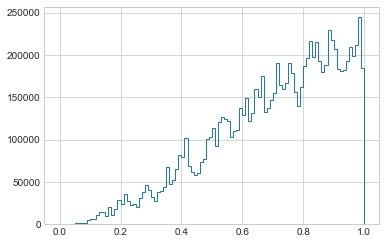

In [9]:
fig, ax = plt.subplots()
_ = ax.hist(gals.redshift, bins=np.arange(0., 1.01, 0.01), histtype='step')
#_ = ax[1].hexbin(gals.raJ2000, gals.decJ2000)

In [10]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1),
                             alpha=2.6e-5,
                             fieldArea=25,
                             surveyDuration=10.,
                             cosmo=DC2,
                             zbinEdges=np.arange(0.001, 1.4, 0.02))

In [11]:
SNPop = snsims.GMM_SALT2Params(numSN=None, zSamples=zdist.zSamples, rng=np.random.RandomState(2),
                               mjdmin=59580, cosmo=DC2, surveyDuration=10.)

In [12]:
MainSN = SNPop.paramSamples

In [13]:
MainSN['random_Hosting'] = np.random.uniform(size=len(MainSN))

In [14]:
hostedSN = MainSN.query('z < 1.0 and random_Hosting < 0.9')

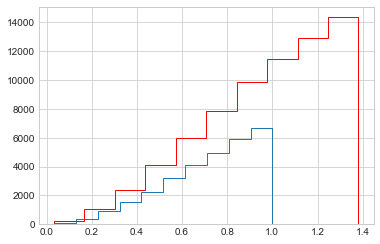

In [15]:
fig, ax = plt.subplots()
hostedSN.z.hist(histtype='step', ax=ax)
MainSN.z.hist(histtype='step', ax=ax, color='r')

In [10]:
hostedSN.x0.describe()

count    3.180600e+04
mean     8.339161e-06
std      3.890644e-05
min      4.925304e-07
25%      2.179136e-06
50%      3.296782e-06
75%      6.210061e-06
max      2.912555e-03
Name: x0, dtype: float64

In [45]:
hostedSN.query('snid ==3')

,c,mB,snid,t0,x0,x1,z,random_Hosting
3,-0.037815,-18.858606,3,61168.926733,0.000767,-0.567411,0.060772,0.381939


In [17]:
gals.head()

,diskMassStellar,morphology/diskMinorAxisArcsec,morphology/positionAngle,morphology/spheroidMinorAxisArcsec,size_bulge_true,size_disk_true,totalMassStellar,uniqueId,raJ2000,decJ2000,redshift
galaxy_id,,,,,,,,,,,
2,9.188840e+07,0.540305,3.569456,0.704382,1.012213,0.557534,1.906675e+08,2127,58.371885,-30.473940,0.085527
4,3.019956e+08,0.351729,17.901840,2.039884,2.855590,1.100472,1.066172e+09,4175,53.785395,-30.429106,0.084432
6,1.016041e+09,1.089987,37.313644,0.423516,0.620078,1.864873,1.307787e+09,6223,56.889586,-30.470440,0.085076
7,1.270596e+08,0.092741,29.687614,0.000000,0.000000,0.286710,1.270596e+08,7247,53.769881,-30.473563,0.166426
8,4.494000e+08,0.184095,128.138213,0.000000,0.000000,0.241691,4.494000e+08,8271,53.759456,-30.481253,0.166445


In [18]:
redshiftvarx = 'redshift'
zmaxx = 0.96
query = '{0} < {1}'.format('redshift', zmaxx)
gals.query(query)
print(query)

redshift < 0.96


In [19]:
from snsims import SersicSamples

In [157]:
class HostingSN(object):
    """ Class to associate SN in the SN params table with hosts
    
    Parameters
    ----------
    
    """
    def __init__(self,
                 galsdf,
                 snpops,
                 redshiftvar='redshift',
                 rng=np.random.RandomState(23),
                 assignBinWidth=0.02,
                 zmax=0.96,
                 hostprob=0.9):
        self.arcsec2Deg = 1.0 / 3600.
        self.snparams = snpops.paramSamples
        self.rng = rng
        self.zmax = zmax
        self.hostprob = hostprob
        self.redshiftvar = 'redshift'
        querystr = '{0} < {1}'.format(redshiftvar, zmax)
        self.galsdf = galsdf.query(querystr)
        
        # Sample of SN split into hosted/hostless
        hstd, hstless = self.splitByHosting(self.snparams, rng=self.rng,
                                            hostprob=self.hostprob, zmax=self.zmax)
        self.hostedSN = hstd
        self.hostlessSN = hstless
    
        self.ss = SersicSamples(self.rng)
    
    @staticmethod
    def splitByHosting(snparams, rng, hostprob=0.9, zmax=0.96):
        """Split the SN sample by hosting type
        """
        #snparams= pops.paramSamples
        snparams['rand_host'] = rng.uniform(size=len(snparams))
        hosted = snparams.query('z < @zmax and rand_host < @hostprob')
        hostlessSN = snparams.query('z >= @zmax or rand_host >= @hostprob')
        return hosted, hostlessSN
    
    def assignHosts(self, binwidth=0.02):
        """
        Find hosts in redshift bins of 0.02 and populate them weighting
        them by stellar mass of host galaxies.
        
        Parameters
        ----------
        binwidth : float, defaults to 0.02
            width of redshift bin
        """
        galsdf = self.galsdf
        self.hostedSN['zbin'] = self.hostedSN.z // binwidth
        self.hostedSN['zbin'] = self.hostedSN.zbin.astype(np.int)
        galsdf['zbin'] = galsdf.redshift // binwidth
        galsdf['zbin'] = galsdf.zbin.astype(np.int)
        
        
        
        syslist = []

        for zbin in self.hostedSN.zbin.unique():
            querystring = 'zbin==@zbin'
            hostedtmp = self.hostedSN.query(querystring)
            numSN = hostedtmp.z.size
            gtmp  = galsdf.query(querystring)
            tot = gtmp.totalMassStellar.sum()
            gids = np.random.choice(gtmp.reset_index().galaxy_id, size=numSN, replace=False,
                                    p=gtmp.totalMassStellar/tot)
            #print(len(hostedtmp), len(gids))
            syslist.append(pd.DataFrame(dict(snid=hostedtmp.reset_index().snid, galaxy_id=gids)))
        
        joiner = pd.concat(syslist).set_index('snid')
        params = self.hostedSN.set_index('snid').join(joiner).set_index('galaxy_id').join(galsdf.set_index('galaxy_id'), rsuffix='_gals')
        #params = self.hostedSN.reset_index().set_index('snid').join(joiner).reset_index().set_index('galaxy_id').join(self.galsdf, rsuffix='_gals')
        params.rename(columns=dict(raJ2000='raJ2000_gal', decJ2000='decJ2000_gal', redshift='z'), inplace=True)
        
        k = joiner.reset_index().set_index('galaxy_id')
        print(k.columns)
        xx = params.join(k)
        cols = params.columns
        dropcols = ['index', 'z', 'zbin', 'zbin_gals', 'rand_host'] #+ list(a for a in cols if 'zbin' not in a)
        keepcols = list(col for col in cols if col not in dropcols)
        #xx = joiner.reset_index().set_index('galaxy_id').join(params)
        return joiner, xx#[keepcols]
    
    def write(self, paramsdf, fname, ftype='hdf'):
        if ftype == 'hdf':
            paramsdf.to_hdf(fname, key='0')
        return
    #def sampleAngles(df, a, b):
    #    return self.ss.sampleAngles(df[a], df[b])[0]
    @property
    def get_positions(self, paramsdf, rng, disk_a='size_disk_true', disk_b='morphology/diskMinorAxisArcsec',
                      bulge_a='size_disk_true', bulge_b='morphology/spheroidMinorAxisArcsec',
                      diskhalfLight='morphology/diskHalfLightRadiusArcsec',
                      bulgehalfLight='morphology/spheroidHalfLightRadiusArcsec',
                      positionAngle='morphology/positionAngle'):
        """
        Obtain ra dec of the SN and add it to the parameter table
        """
        paramsdf['rand_SM'] = rng.uniform(size=len(paramsdf))
        paramsdf['diskmassratio'] = paramsdf['diskMassStellar'] / paramsdf['totalMassStellar']
        paramsdf['inDisk'] = paramsdf['diskmassratio'] > paramsdf['rand_SM']
        paramsdf.inDisk = paramsdf.inDisk.astype(np.int)
        x = paramsdf['inDisk']
        # Add angle samples
        paramsdf['diskAngle'] = self.ss.sampleAngles(paramsdf[disk_a], paramsdf[disk_b], numSamples=len(paramsdf))
        paramsdf['bulgeAngle'] = self.ss.sampleAngles(paramsdf[bulge_a], paramsdf[bulge_b], numSamples=len(paramsdf))
        
        paramsdf['diskRadius'] = self.ss.sampleRadius(paramsdf[diskhalfLight], numSamples=len(paramsdf), sersicIndex=1)
        paramsdf['bulgeRadius'] = self.ss.sampleRadius(paramsdf[bulgehalfLight], numSamples=len(paramsdf), sersicIndex=4)
        paramsdf['theta'] = paramsdf['diskAngle'] * x + (1-x) *paramsdf['bulgeAngle'] - paramsdf[positionAngle] +90 
        paramsdf['theta'] = np.radians(paramsdf.theta)
        paramsdf['radial'] = paramsdf['diskRadius'] * x + paramsdf['bulgeRadius']* (1-x)
        paramsdf['deltaRA'] = np.cos(paramsdf['theta']) * paramsdf['radial']
        paramsdf['deltaDec'] = np.sin(paramsdf['theta']) * paramsdf['radial']
        paramsdf['snra'] = paramsdf['raJ2000_gal'] + paramsdf['deltaRA'] * self.arcsec2Deg
        paramsdf['sndec'] = paramsdf['decJ2000_gal'] +paramsdf['deltaDec'] * self.arcsec2Deg
        return paramsdf.set_index('snid')

In [158]:
hstsn = HostingSN(gals, SNPop)

In [159]:
x = hstsn.assignHosts()

/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Index(['snid'], dtype='object')


In [175]:
t.to_csv('Hosted_SN_table.csv', sep=' ')

In [160]:
x[1].columns

Index(['c', 'mB', 't0', 'x0', 'x1', 'z', 'random_Hosting', 'rand_host', 'zbin',
       'diskMassStellar', 'morphology/diskHalfLightRadiusArcsec',
       'morphology/diskMinorAxisArcsec', 'morphology/positionAngle',
       'morphology/spheroidHalfLightRadiusArcsec',
       'morphology/spheroidMinorAxisArcsec', 'size_bulge_true',
       'size_disk_true', 'totalMassStellar', 'uniqueId', 'raJ2000_gal',
       'decJ2000_gal', 'z', 'zbin_gals', 'snid'],
      dtype='object')

In [161]:
hstsn.arcsec2Deg

0.0002777777777777778

In [164]:
t = hstsn.get_positions(x[1], rng=np.random.RandomState(2))

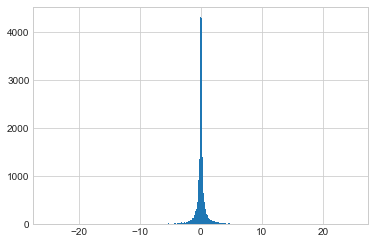

In [173]:
t.deltaRA.hist(bins=np.arange(-25, 25, 0.1))

In [163]:
x[0].reset_index().set_index('galaxy_id').join(x[1])

ValueError: columns overlap but no suffix specified: Index(['snid'], dtype='object')

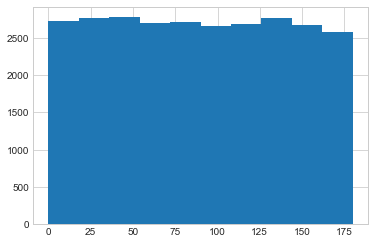

In [108]:
x[1]['morphology/positionAngle'].hist()

In [99]:
x[1].columns

Index(['c', 'mB', 't0', 'x0', 'x1', 'random_Hosting', 'diskMassStellar',
       'morphology/diskHalfLightRadiusArcsec',
       'morphology/diskMinorAxisArcsec', 'morphology/positionAngle',
       'morphology/spheroidHalfLightRadiusArcsec',
       'morphology/spheroidMinorAxisArcsec', 'size_bulge_true',
       'size_disk_true', 'totalMassStellar', 'uniqueId', 'raJ2000_gal',
       'decJ2000_gal', 'rand_SM', 'diskmassratio', 'inDisk', 'diskAngle',
       'bulgeAngle', 'diskRadius', 'bulgeRadius'],
      dtype='object')

In [97]:
'snid' in x[0].reset_index().set_index('galaxy_id').columns

True

In [93]:
'snid' in x[1].join(x[0].set_index('galaxy_id')).columns

False

In [87]:
hstsn.get_positions(x[1], np.random.RandomState(1))

KeyError: 'snid'

In [48]:
gals.head()

,diskMassStellar,galaxy_id,morphology/diskHalfLightRadiusArcsec,morphology/diskMinorAxisArcsec,morphology/positionAngle,morphology/spheroidHalfLightRadiusArcsec,morphology/spheroidMinorAxisArcsec,size_bulge_true,size_disk_true,totalMassStellar,uniqueId,raJ2000,decJ2000,redshift
0,9.188840e+07,2,0.557534,0.540305,3.569456,1.012213,0.704382,1.012213,0.557534,1.906675e+08,2127,58.371885,-30.473940,0.085527
1,3.019956e+08,4,1.100472,0.351729,17.901840,2.855590,2.039884,2.855590,1.100472,1.066172e+09,4175,53.785395,-30.429106,0.084432
2,1.016041e+09,6,1.864873,1.089987,37.313644,0.620078,0.423516,0.620078,1.864873,1.307787e+09,6223,56.889586,-30.470440,0.085076
3,1.270596e+08,7,0.286710,0.092741,29.687614,0.000000,0.000000,0.000000,0.286710,1.270596e+08,7247,53.769881,-30.473563,0.166426
4,4.494000e+08,8,0.241691,0.184095,128.138213,0.000000,0.000000,0.000000,0.241691,4.494000e+08,8271,53.759456,-30.481253,0.166445


In [50]:
gals.query('galaxy_id ==19728327')

,diskMassStellar,galaxy_id,morphology/diskHalfLightRadiusArcsec,morphology/diskMinorAxisArcsec,morphology/positionAngle,morphology/spheroidHalfLightRadiusArcsec,morphology/spheroidMinorAxisArcsec,size_bulge_true,size_disk_true,totalMassStellar,uniqueId,raJ2000,decJ2000,redshift
9133716,5.406618e+09,19728327,1.342281,0.616317,141.602635,3.749182,2.179084,3.749182,1.342281,1.363469e+10,20201806927,57.533901,-25.879895,0.073724


In [51]:
x[1].head()

,snid,c,mB,t0,x0,x1,random_Hosting,diskMassStellar,galaxy_id,morphology/diskHalfLightRadiusArcsec,...,uniqueId,raJ2000_gal,decJ2000_gal,rand_SM,diskmassratio,inDisk,diskAngle,bulgeAngle,diskRadius,bulgeRadius
galaxy_id,,,,,,,,,,,,,,,,,,,,,
1177847,0,-0.045258,-19.330055,61171.381393,0.004126,1.240459,0.541475,2.827468e+08,2520822.0,0.181408,...,2.581322e+09,53.937908,-28.084882,0.417022,0.699937,1,-45.256180,29.523655,0.095371,0.123087
3632540,2,0.040885,-19.084994,61586.268044,0.001589,-0.639407,0.513639,1.388854e+08,7924274.0,0.139422,...,8.114457e+09,56.097168,-26.851944,0.720324,0.426689,0,204.652296,26.740064,0.243089,2.462265
19728327,3,-0.037815,-18.858606,61168.926733,0.000767,-0.567411,0.381939,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000114,NaN,0,NaN,NaN,NaN,NaN
3633009,4,0.136330,-18.869271,61114.342478,0.001044,-0.042355,0.639819,8.347225e+08,7925559.0,0.120036,...,8.115772e+09,56.365829,-26.847831,0.302333,0.784119,1,-16.686764,-67.607261,0.104436,0.212301
19724803,5,-0.069447,-19.453967,60785.722097,0.001026,0.371113,0.621964,NaN,NaN,NaN,...,NaN,NaN,NaN,0.146756,NaN,0,NaN,NaN,NaN,NaN


In [42]:
hstsn.get_positions(x[1], rng=np.random.RandomState(1))

,c,mB,t0,x0,x1,random_Hosting,diskMassStellar,galaxy_id,morphology/diskHalfLightRadiusArcsec,morphology/diskMinorAxisArcsec,...,uniqueId,raJ2000_gal,decJ2000_gal,rand_SM,diskmassratio,inDisk,diskAngle,bulgeAngle,diskRadius,bulgeRadius
snid,,,,,,,,,,,,,,,,,,,,,
0,-0.045258,-19.330055,61171.381393,4.126362e-03,1.240459,0.541475,2.827468e+08,2520822.0,0.181408,0.107024,...,2.581322e+09,53.937908,-28.084882,0.417022,0.699937,1,-45.256180,29.523655,0.095371,0.123087
2,0.040885,-19.084994,61586.268044,1.588695e-03,-0.639407,0.513639,1.388854e+08,7924274.0,0.139422,0.131757,...,8.114457e+09,56.097168,-26.851944,0.720324,0.426689,0,204.652296,26.740064,0.243089,2.462265
3,-0.037815,-18.858606,61168.926733,7.671906e-04,-0.567411,0.381939,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000114,NaN,0,NaN,NaN,NaN,NaN
4,0.136330,-18.869271,61114.342478,1.044172e-03,-0.042355,0.639819,8.347225e+08,7925559.0,0.120036,0.068329,...,8.115772e+09,56.365829,-26.847831,0.302333,0.784119,1,-16.686764,-67.607261,0.104436,0.212301
5,-0.069447,-19.453967,60785.722097,1.026211e-03,0.371113,0.621964,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.146756,NaN,0,NaN,NaN,NaN,NaN
6,0.097744,-18.506689,60326.967514,3.877670e-04,-0.064428,0.899348,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.092339,NaN,0,NaN,NaN,NaN,NaN
7,0.087208,-18.794762,61840.339027,4.524229e-04,0.055926,0.722395,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.186260,NaN,0,NaN,NaN,NaN,NaN
8,-0.044682,-19.285951,60673.739559,7.425991e-04,0.008116,0.719848,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.345561,NaN,0,NaN,NaN,NaN,NaN
9,-0.051090,-19.275717,60553.919554,9.377070e-04,-0.219024,0.487265,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.396767,NaN,0,NaN,NaN,NaN,NaN


In [33]:
rng.uniform(size=10)

array([ 0.46147936,  0.78052918,  0.11827443,  0.63992102,  0.14335329,
        0.94466892,  0.52184832,  0.41466194,  0.26455561,  0.77423369])

In [133]:
def get_positions(paramsdf, rng):
        paramsdf['rand_SM'] = rng.uniform(size=len(paramsdf))
        paramsdf['diskmassratio'] = paramsdf['diskMassStellar'] / paramsdf['totalMassStellar']
        paramsdf['inDisk'] = paramsdf['diskmassratio'] > paramsdf['rand_SM']
        paramsdf.inDisk = paramsdf.inDisk.astype(np.int)
        
        x = paramsdf['inDisk']
        #paramsdf['eff_a'] = paramsdf['size_disk_true'] * x  + params['size_bulge_true'] * (1 - x)
        #paramsdf['eff_b'] = paramsdf['morphology/diskMinorAxisArcsec'] * x +\
        #    paramsdf['morphology/spheroidMinorAxisArcsec'] * (1-x)
        return paramsdf.reset_index().set_index('snid')

In [134]:
y = get_positions(hstsn.assignHosts()[1], np.random.RandomState(1))

/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
y.plot.pie(y='inDisk')

In [21]:
x = hstsn.assignHosts()

/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [26]:
hstsn.get_positions(np.random.RandomState(0), x)

AttributeError: 'tuple' object has no attribute 'uniform'

In [27]:
rng = np.random.RandomState(0)

In [ ]:
rng.uniform

In [124]:
x[1]#.rename(columns=dict(raJ2000='raJ2000_gal', decJ2000='decJ2000_gal'), inplace=True)

,snid,c,mB,t0,x0,x1,diskMassStellar,morphology/diskMinorAxisArcsec,morphology/positionAngle,morphology/spheroidMinorAxisArcsec,size_bulge_true,size_disk_true,totalMassStellar,uniqueId,raJ2000_gal,decJ2000_gal,redshift
galaxy_id,,,,,,,,,,,,,,,,,
1178320,0,-0.088862,-19.565890,61171.381393,5.124135e-03,1.328520,3.936158e-02,0.351228,17.905921,17.275086,21.518909,0.867267,1.871289e+11,1206599759,56.199633,-29.848654,0.036441
3634470,2,-0.021786,-19.489928,61586.268044,2.294276e-03,0.847867,2.890062e+09,0.346810,168.649315,0.769134,1.034941,0.434835,9.283423e+09,3721697359,57.951319,-30.202880,0.051014
19724755,3,-0.116500,-18.846012,61168.926733,7.630419e-04,-2.501837,3.881935e+08,1.544285,127.313298,3.167557,5.011816,2.627598,4.047492e+09,20198149199,56.937255,-28.963774,0.067667
3634407,4,-0.136773,-19.789960,61114.342478,2.429400e-03,0.892539,4.439839e+09,0.375284,170.985328,1.694696,2.133711,0.551655,2.158527e+10,3721632847,54.557638,-29.550524,0.054174
19726591,5,0.041987,-18.990742,60785.722097,6.718007e-04,-0.399634,5.677523e+08,0.210818,1.026254,0.781146,1.405988,0.876830,8.602369e+08,20200029263,54.480678,-25.607431,0.068072
19725292,6,0.024123,-18.685150,60326.967514,4.569148e-04,0.125615,3.618334e+08,1.043291,174.787806,0.000000,0.000000,1.500169,3.618334e+08,20198699087,54.161243,-27.441257,0.068526
328003,7,0.012016,-18.970868,61840.339027,5.320096e-04,0.192013,1.517084e+10,1.066031,98.648521,2.804898,3.222435,2.217883,1.916423e+10,335875151,56.239834,-27.549308,0.078017
19728325,8,-0.082685,-19.543794,60673.739559,9.378842e-04,0.999704,7.105572e+09,0.739545,144.141803,2.198340,2.767424,1.190992,1.466765e+10,20201804879,53.855954,-25.724170,0.073737
19726387,9,-0.092999,-19.620086,60553.919554,1.279786e-03,1.312481,4.104641e+08,1.564846,131.453489,2.012601,2.119999,2.170714,6.864233e+08,20199820367,58.197463,-28.267017,0.072545


/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

1 1
2 2
14 14
22 22
25 25
44 44
54 54
70 70
83 83
106 106
119 119
184 184
188 188
198 198
227 227
236 236
316 316
313 313
331 331
382 382
436 436
462 462
443 443
525 525
497 497
597 597
666 666
672 672
668 668
750 750
808 808
831 831
880 880
914 914
902 902
939 939
1032 1032
1042 1042
1042 1042
1173 1173
1110 1110
1238 1238
1273 1273
1206 1206
1340 1340
1273 1273
1383 1383


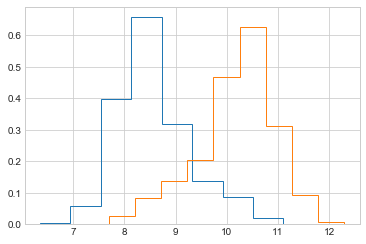

In [68]:
hstsn.galsdf.totalMassStellar.apply(np.log10).hist(histtype='step', normed=1)
hstsn.assignHosts()[1].totalMassStellar.apply(np.log10).hist(histtype='step', normed=1)

In [59]:
hstsn.hostedSN.z.size

27017

In [60]:
hstsn.galsdf.redshift.size

9182273

In [61]:
hstsn.hostlessSN.z.size

43201

In [62]:
params = hstsn.assignHosts()

/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rbiswas/soft/LSST3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

1 1
2 2
14 14
22 22
25 25
44 44
54 54
70 70
83 83
106 106
119 119
184 184
188 188
198 198
227 227
236 236
316 316
313 313
331 331
382 382
436 436
462 462
443 443
525 525
497 497
597 597
666 666
672 672
668 668
750 750
808 808
831 831
880 880
914 914
902 902
939 939
1032 1032
1042 1042
1042 1042
1173 1173
1110 1110
1238 1238
1273 1273
1206 1206
1340 1340
1273 1273
1383 1383


In [63]:
params[1].columns

Index(['index', 'c', 'mB', 't0', 'x0', 'x1', 'z', 'rand_host', 'zbin',
       'diskMassStellar', 'morphology/diskMinorAxisArcsec',
       'morphology/positionAngle', 'morphology/spheroidMinorAxisArcsec',
       'size_bulge_true', 'size_disk_true', 'totalMassStellar', 'uniqueId',
       'raJ2000', 'decJ2000', 'redshift', 'zbin_gals'],
      dtype='object')

In [64]:
joiner.head()

,galaxy_id
snid,
0,14128271
2,3632609
4,3634364
3,331677
5,3255720


In [32]:
len(joiner)

27017

In [39]:
hstsn.hostedSN.head()

,c,mB,t0,x0,x1,z,rand_host,zbin
snid,,,,,,,,
0,-0.088862,-19.565890,61171.381393,0.005124,1.328520,0.033127,0.517298,1
2,-0.021786,-19.489928,61586.268044,0.002294,0.847867,0.047347,0.765460,2
3,-0.116500,-18.846012,61168.926733,0.000763,-2.501837,0.060772,0.282396,3
4,-0.136773,-19.789960,61114.342478,0.002429,0.892539,0.052595,0.221045,2
5,0.041987,-18.990742,60785.722097,0.000672,-0.399634,0.068603,0.686222,3


In [43]:
hstsn.galsdf.head()

,diskMassStellar,morphology/diskMinorAxisArcsec,morphology/positionAngle,morphology/spheroidMinorAxisArcsec,size_bulge_true,size_disk_true,totalMassStellar,uniqueId,raJ2000,decJ2000,redshift,zbin
galaxy_id,,,,,,,,,,,,
2,9.188840e+07,0.540305,3.569456,0.704382,1.012213,0.557534,1.906675e+08,2127,58.371885,-30.473940,0.085527,4
4,3.019956e+08,0.351729,17.901840,2.039884,2.855590,1.100472,1.066172e+09,4175,53.785395,-30.429106,0.084432,4
6,1.016041e+09,1.089987,37.313644,0.423516,0.620078,1.864873,1.307787e+09,6223,56.889586,-30.470440,0.085076,4
7,1.270596e+08,0.092741,29.687614,0.000000,0.000000,0.286710,1.270596e+08,7247,53.769881,-30.473563,0.166426,8
8,4.494000e+08,0.184095,128.138213,0.000000,0.000000,0.241691,4.494000e+08,8271,53.759456,-30.481253,0.166445,8


In [45]:
hstsn.hostedSN.reset_index().set_index('snid').join(joiner).set_index('galaxy_id').join(hstsn.galsdf, rsuffix='_gals').head()

,c,mB,t0,x0,x1,z,rand_host,zbin,diskMassStellar,morphology/diskMinorAxisArcsec,morphology/positionAngle,morphology/spheroidMinorAxisArcsec,size_bulge_true,size_disk_true,totalMassStellar,uniqueId,raJ2000,decJ2000,redshift,zbin_gals
galaxy_id,,,,,,,,,,,,,,,,,,,,
14128271,-0.088862,-19.565890,61171.381393,0.005124,1.328520,0.033127,0.517298,1,6.598865e+08,2.154249,33.199173,11.922039,14.585689,3.419360,6.731106e+10,14467349583,55.607621,-25.687084,0.026667,1
3632609,-0.021786,-19.489928,61586.268044,0.002294,0.847867,0.047347,0.765460,2,8.443001e+08,4.299582,125.646496,6.470961,10.078213,5.073960,9.523447e+09,3719791695,53.470820,-26.288899,0.043995,2
331677,-0.116500,-18.846012,61168.926733,0.000763,-2.501837,0.060772,0.282396,3,1.404949e+10,1.929082,9.251576,1.671994,2.806725,2.163633,1.736073e+10,339637327,57.909724,-26.481652,0.079551,3
3634364,-0.136773,-19.789960,61114.342478,0.002429,0.892539,0.052595,0.221045,2,3.022981e+10,1.546217,28.998074,2.239810,3.178727,1.969933,6.209315e+10,3721588815,58.135799,-30.196096,0.053349,2
3255720,0.041987,-18.990742,60785.722097,0.000672,-0.399634,0.068603,0.686222,3,1.763430e+10,0.800025,174.383467,3.072466,3.765809,0.934571,8.583386e+10,3333857359,58.093098,-30.032414,0.064349,3


(array([  2.00000000e+00,   2.00000000e+01,   4.80000000e+01,
          1.10000000e+02,   1.85000000e+02,   2.73000000e+02,
          3.91000000e+02,   4.80000000e+02,   5.89000000e+02,
          6.94000000e+02,   8.44000000e+02,   1.02600000e+03,
          1.03600000e+03,   1.30900000e+03,   1.39200000e+03,
          1.56300000e+03,   1.69500000e+03,   1.89400000e+03,
          2.02700000e+03,   2.19600000e+03,   2.28800000e+03,
          2.39400000e+03,   2.50700000e+03,   2.73500000e+03,
          2.81100000e+03,   2.87700000e+03,   3.01600000e+03,
          3.27000000e+03,   3.34000000e+03,   3.45400000e+03,
          3.59900000e+03,   3.69700000e+03,   3.81800000e+03,
          3.84700000e+03]),
 array([ 0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,
         0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,
         0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ,  1.04,
         1.08,  1.12,  1.16,  1.2 ,  1.24,  1.28,  1.32,  1.36]),
 <a list of

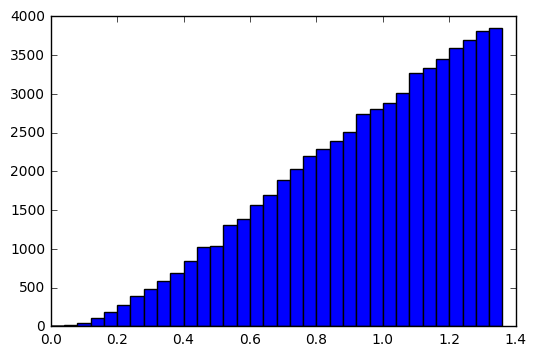

In [20]:
plt.hist(zdist.zSamples, bins=np.arange(0., 1.4, 0.04))

In [20]:
from lsst.sims.utils import samplePatchOnSphere

In [35]:
gmm_dist = snsims.GMM_SALT2Params(numSN=len(zdist.zSamples), 
                                  zSamples=zdist.zSamples, 
                                  rng=np.random.RandomState(8),
                                  cosmo=DC2,
                                  mjdmin=59580., surveyDuration=10)

In [38]:
df = gmm_dist.paramSamples

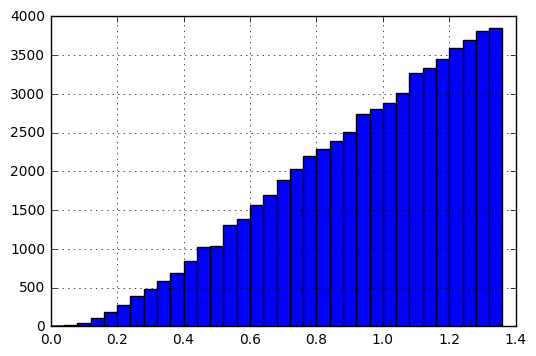

In [41]:
df.z.hist(bins=np.arange(0., 1.4, 0.04))

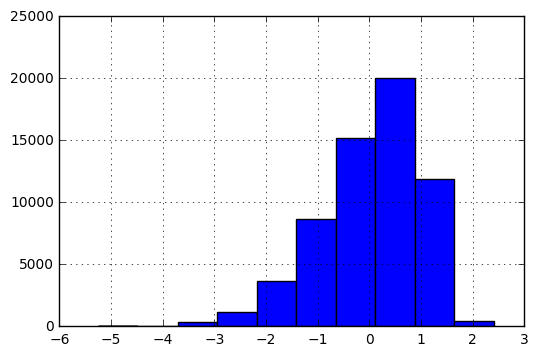

In [43]:
df.x1.hist()

In [46]:
rng = np.random.RandomState(8)

In [89]:
df['t0'] = np.random.uniform(59580, 59580 + 3650., size=len(df))
df['snid'] = df.index.values
df.set_index('snid', inplace=True)

In [90]:
df.to_csv('sntable.csv')

In [91]:
dflowz = df.query('z < 0.95')

In [92]:
hosted = dflowz.sample(frac=0.9)

In [143]:
binwidth = 0.01
hosted['zbin'] = hosted.z//binwidth
g['zbin'] = g.redshift//binwidth
g.zbin = g.zbin.astype(np.int)
hosted.zbin = hosted.zbin.astype(np.int)

/usr/local/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [144]:
zbins = hosted.zbin.unique()

In [145]:
g.columns

Index([u'galaxy_id', u'diskMassStellar', u'morphology/diskMinorAxisArcsec',
       u'morphology/spheroidMinorAxisArcsec', u'size_bulge_true',
       u'size_disk_true', u'totalMassStellar', u'uniqueId', u'raJ2000',
       u'decJ2000', u'redshift', u'totalMassStellar_catsim',
       u'diskMassStellar_catsim', u'zbin'],
      dtype='object')

In [146]:
hosted.head()

,c,mB,x0,x1,z,t0,zbin
snid,,,,,,,
17905,0.132765,-18.740207,4.940208e+11,0.998184,0.827976,62164.398519,82
7394,0.094194,-18.863014,5.536334e+11,0.893994,0.580287,63191.790821,58
14875,0.055517,-19.144506,7.181698e+11,0.720432,0.730854,61662.587871,73
2244,0.034400,-18.687003,4.749097e+11,-1.412840,0.371834,60398.849066,37
5507,0.071826,-19.102017,6.923844e+11,0.008971,0.512510,61867.792942,51


In [147]:
syslist = []

for zbin in hosted.zbin.unique():
    querystring = 'zbin==@zbin'
    hostedtmp = hosted.query(querystring)
    numSN = hostedtmp.z.size
    gtmp  = g.query(querystring)
    tot = gtmp.totalMassStellar.sum()
    gids = np.random.choice(gtmp.galaxy_id, size=numSN, replace=False, p=gtmp.totalMassStellar/tot)
    print(len(hostedtmp), len(gids))
    syslist.append(pd.DataFrame(dict(snid=hostedtmp.reset_index().snid, galaxy_id=gids)))
    joiner = pd.concat(syslist).set_index('snid')
    return joiner

(526, 526)
(321, 321)
(468, 468)
(157, 157)
(241, 241)
(374, 374)
(540, 540)
(339, 339)
(554, 554)
(500, 500)
(566, 566)
(517, 517)
(637, 637)
(351, 351)
(548, 548)
(454, 454)
(437, 437)
(279, 279)
(406, 406)
(64, 64)
(523, 523)
(559, 559)
(168, 168)
(195, 195)
(412, 412)
(593, 593)
(369, 369)
(228, 228)
(325, 325)
(621, 621)
(354, 354)
(536, 536)
(216, 216)
(109, 109)
(480, 480)
(460, 460)
(261, 261)
(277, 277)
(236, 236)
(464, 464)
(380, 380)
(513, 513)
(58, 58)
(529, 529)
(288, 288)
(182, 182)
(416, 416)
(94, 94)
(461, 461)
(443, 443)
(311, 311)
(598, 598)
(175, 175)
(155, 155)
(144, 144)
(222, 222)
(26, 26)
(204, 204)
(305, 305)
(311, 311)
(132, 132)
(99, 99)
(156, 156)
(29, 29)
(94, 94)
(104, 104)
(230, 230)
(48, 48)
(493, 493)
(81, 81)
(205, 205)
(135, 135)
(63, 63)
(115, 115)
(356, 356)
(115, 115)
(65, 65)
(87, 87)
(18, 18)
(6, 6)
(37, 37)
(42, 42)
(44, 44)
(30, 30)
(14, 14)
(4, 4)
(11, 11)
(10, 10)
(6, 6)
(1, 1)
(1, 1)
(4, 4)
(1, 1)


In [148]:
joiner = pd.concat(syslist).set_index('snid')

In [149]:
joiner.head()

,galaxy_id
snid,
17905,5261490
19747,4686768
18075,10157463
19184,4701185
17936,20212096


In [150]:
h = hosted.join(joiner)

In [151]:
h.head()

,c,mB,x0,x1,z,t0,zbin,galaxy_id
snid,,,,,,,,
17905,0.132765,-18.740207,4.940208e+11,0.998184,0.827976,62164.398519,82,5261490
7394,0.094194,-18.863014,5.536334e+11,0.893994,0.580287,63191.790821,58,11685520
14875,0.055517,-19.144506,7.181698e+11,0.720432,0.730854,61662.587871,73,8966343
2244,0.034400,-18.687003,4.749097e+11,-1.412840,0.371834,60398.849066,37,14192637
5507,0.071826,-19.102017,6.923844e+11,0.008971,0.512510,61867.792942,51,8864672


In [152]:
any(g.galaxy_id.isnull())

False

In [153]:
h.galaxy_id.unique().size -  h.galaxy_id.size

0

In [154]:
joiner.loc[17905]

galaxy_id    5261490
Name: 17905, dtype: int64

In [179]:
joined = h.set_index('galaxy_id').join(g.set_index('galaxy_id'), rsuffix='_gal')

In [180]:
X = joined.z - joined.redshift

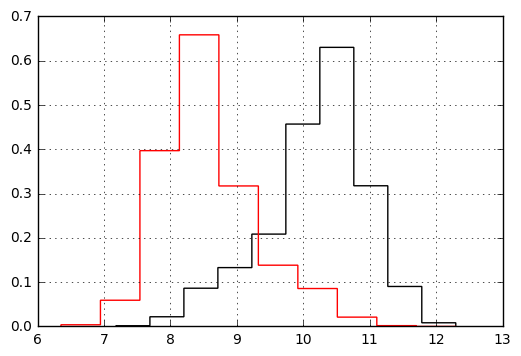

In [181]:
fig, ax = plt.subplots()
_ = joined.totalMassStellar.apply(np.log10).hist(ax =ax, histtype='step', normed=1, color='k')
_ = g.totalMassStellar.apply(np.log10).hist(ax =ax, histtype='step', normed=1, color='r')

In [182]:
galprops = g.set_index('galaxy_id').join(joiner.set_index('galaxy_id'))

In [183]:
joined.columns

Index([u'c', u'mB', u'x0', u'x1', u'z', u't0', u'zbin', u'diskMassStellar',
       u'morphology/diskMinorAxisArcsec',
       u'morphology/spheroidMinorAxisArcsec', u'size_bulge_true',
       u'size_disk_true', u'totalMassStellar', u'uniqueId', u'raJ2000',
       u'decJ2000', u'redshift', u'totalMassStellar_catsim',
       u'diskMassStellar_catsim', u'zbin_gal'],
      dtype='object')

In [184]:
for x in ['diskMassStellar_catsim', 'zbin_gal', 'uniqueId', 'totalMassStellar_catsim']:
    del joined[x]

In [185]:
joined.columns

Index([u'c', u'mB', u'x0', u'x1', u'z', u't0', u'zbin', u'diskMassStellar',
       u'morphology/diskMinorAxisArcsec',
       u'morphology/spheroidMinorAxisArcsec', u'size_bulge_true',
       u'size_disk_true', u'totalMassStellar', u'raJ2000', u'decJ2000',
       u'redshift'],
      dtype='object')

In [187]:
joined.rename(columns=dict(raJ2000='raHost', decJ2000='decHost'), inplace=True)

In [191]:
joined[['c', u'mB', u'x0', u'x1', u't0', u'zbin', u'diskMassStellar',
       u'morphology/diskMinorAxisArcsec',
       u'morphology/spheroidMinorAxisArcsec', u'totalMassStellar', u'raHost', u'decHost',
       u'redshift']].to_csv('SNWithHost')
joiner.to_csv('galaxy_SN_map.csv')

In [ ]:
joined['random'] = np.random.Unif

# Scratch

In [190]:
hosted.z.size

24316

In [62]:
import pandas as pd

In [66]:
gals = pd.read_csv('~/data/LSST/DC2/protDC2.csv.gz')

In [67]:
g = gals.query('redshift < 0.95')

In [55]:
df.head()

,c,mB,x0,x1,z,t0
0,0.069174,-18.725807,4.878707e+11,0.962420,0.033296,62118.612847
1,0.108647,-18.868438,5.567082e+11,0.718713,0.016907,60421.113871
2,-0.082105,-19.548539,1.039515e+12,1.256177,0.047614,62744.122860
3,0.028143,-19.010567,6.362376e+11,0.156738,0.078100,59616.848990
4,0.051105,-18.931618,5.898181e+11,0.935463,0.054911,59626.918417
